In [2]:
import pytesseract
import cv2
import os

In [3]:
image = cv2.imread("S__49684702.jpg")
base_image = image.copy()
img_file_base_name = "kbank2"
instance_num="04"
img_prefix_name=img_file_base_name+instance_num
folder_path = "temp/4_contour/kbank"
# Define the folder path
folder_path_roi = "temp/4_contour/kbank/roi2/logo"

# Check if the folder exists; if not, create it
if not os.path.exists(folder_path_roi):
    os.makedirs(folder_path_roi)
ori_height, ori_width, c = base_image.shape
print(ori_height, ori_width, c )
folder_path_roi = "temp/4_contour/kbank/roi2"

886 686 3


In [4]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [5]:
cv2.imwrite(f"{folder_path}/4_1_gray_{img_prefix_name}.png",gray)

True

In [6]:
blur = cv2.GaussianBlur(gray,(7,7),0)

In [7]:
cv2.imwrite(f"{folder_path}/4_2_blur_{img_prefix_name}.png",blur)

True

In [8]:
thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

In [9]:
cv2.imwrite(f"{folder_path}/4_3_thresh_{img_prefix_name}.png",thresh)

True

In [10]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT,(25,6))

In [11]:
cv2.imwrite(f"{folder_path}/4_4_kernal_{img_prefix_name}.png",kernal)

True

In [12]:
dilate = cv2.dilate(thresh,kernal, iterations = 1)

In [13]:
cv2.imwrite(f"{folder_path}/4_5_dilate_{img_prefix_name}.png",dilate)

True

In [14]:
#cnts = contours
cnts = cv2.findContours(dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [15]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [16]:
cnts = sorted(cnts,key=lambda x: cv2.boundingRect(x)[0])

In [17]:
import easyocr
ori_height, ori_width, c = base_image.shape
for index,c in enumerate(cnts):
    x,y,w,h = cv2.boundingRect(c)
    #w-h > 20 is logo detect
    #logo
    if w-h<20 and w>40 and h>40:
        roi = image[y:y+h,x:x+w]
        cv2.imwrite(f'{folder_path_roi}/logo/_{index}_{img_prefix_name}_roi.jpg',roi)
    elif h>20 and w>20 and w<ori_width-20 and w-h>20:
        cv2.rectangle(image,(x,y),(x+w,y+h),(36,255,12),2)
        roi = image[y:y+h,x:x+w]
        cv2.imwrite(f'{folder_path_roi}/{index}_{img_prefix_name}_roi.jpg',roi)
    
    # # ocr_result = pytesseract.image_to_stirng(roi)
    # reader = easyocr.Reader(['th','en'],gpu=False)
    # # detect
    # # easyocr_result = reader.readtext(roi,detail=0, verbose=False)
    # # Recognize
    # easyocr_result = reader.recognize(roi,detail=0)
    
    # print(f"{index}_{img_prefix_name}_roi.jpg",easyocr_result)
    
cv2.imwrite(f"{folder_path}/4_6_bbox_{img_prefix_name}.png",image)


True

Using CPU. Note: This module is much faster with a GPU.


Desired texts have been written to temp/4_contour/kbank/text_ocrkbank204.txt


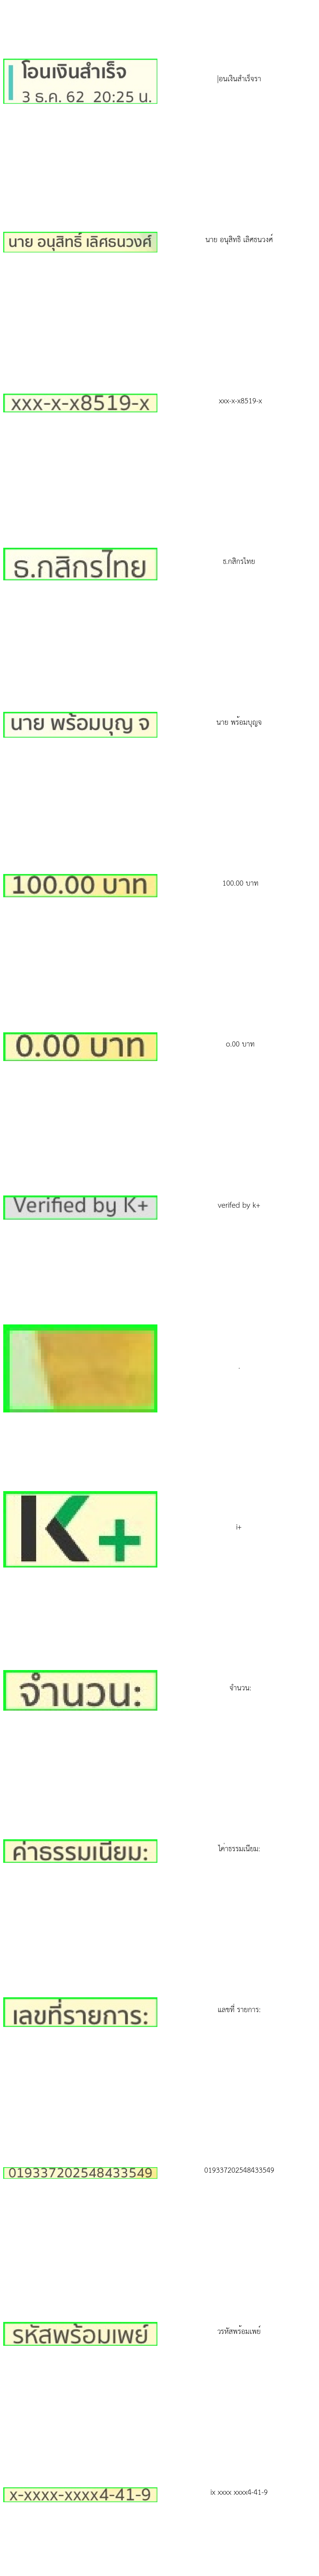

In [18]:
import os
import cv2
import easyocr
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# Define the folder path

# Initialize EasyOCR reader
reader = easyocr.Reader(['th', 'en'], gpu=False)

# Create a list to store the desired texts and image paths
desired_texts = []
image_paths = []

# Loop through the files and process each file
for filename in os.listdir(folder_path_roi):
    file_path = os.path.join(folder_path_roi, filename)
    
    # Check if the item is a file (not a subdirectory)
    if os.path.isfile(file_path):
        # Read the image
        img = cv2.imread(file_path)
        
        # Perform OCR on the image
        easyocr_result = reader.recognize(img)
        
        # Loop through the OCR results
        for result in easyocr_result:
            # Check if the text matches the desired patterns
            text = result[1]
            
            desired_texts.append(text)
            image_paths.append(file_path)

# Write the desired texts to a file
output_filename = f"{folder_path}/text_ocr{img_prefix_name}.txt"
with open(output_filename, 'w', encoding='utf-8') as file:
    for text in desired_texts:
        file.write(text + '\n')

print("Desired texts have been written to", output_filename)

# Calculate the number of rows
num_rows = len(image_paths)

# Create a subplot with two columns
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Set a Thai font for rendering Thai text
font_properties = FontProperties(fname='fonts\THSarabunNew.ttf')  # Replace with the path to your Thai font

# Loop through the image paths and texts, and plot them in the subplot
for i, (image_path, text) in enumerate(zip(image_paths, desired_texts)):
    # Read and display the image on the left side
    img = cv2.imread(image_path)
    axs[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i, 0].axis('off')
    
    # Display the text on the right side with the Thai font
    axs[i, 1].text(0.5, 0.5, text, fontsize=24, ha='center', fontproperties=font_properties)
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


In [19]:
desired_texts

['|อนเงินสำเร็จรา',
 'นาย อนุสิทธิ เลิศธนวงศ์',
 '  xxx-x-x8519-x ',
 'ธ.กสิกรไทย',
 'นาย พร้อมบุญฺจ',
 ' 100.00 บาท',
 ' o.00 บาท',
 ' verifed by k+ ',
 '.',
 'i+',
 ' จำนวน:',
 'ไค่าธรรมเนียม:',
 'แลขที่ รายการ:',
 ' 019337202548433549 ',
 'วรหัสพร้อมเพย์',
 ' ix xxxx xxxx4-41-9 ']

In [20]:
import os
import cv2
import easyocr
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# Define the folder path

# Initialize EasyOCR reader
reader = easyocr.Reader(['th', 'en'], gpu=False)

# Create a list to store the desired texts and image paths
desired_texts = []
image_paths = []

# Loop through the files and process each file
for filename in os.listdir(folder_path_roi):
    file_path = os.path.join(folder_path_roi, filename)
    
    # Check if the item is a file (not a subdirectory)
    if os.path.isfile(file_path):
        # Read the image
        img = cv2.imread(file_path)
        
        # Perform OCR on the image
        easyocr_result = reader.recognize(img)
        print(easyocr_result)
        # Loop through the OCR results
        for result in easyocr_result:
            # Check if the text matches the desired patterns
            text = result[1]
            
            desired_texts.append(text)
            image_paths.append(file_path)


Using CPU. Note: This module is much faster with a GPU.


[([[0, 0], [284, 0], [284, 83], [0, 83]], '|อนเงินสำเร็จรา', 0.35575043998191574)]
[([[0, 0], [306, 0], [306, 41], [0, 41]], 'นาย อนุสิทธิ เลิศธนวงศ์', 0.49828854459368027)]
[([[0, 0], [205, 0], [205, 25], [0, 25]], '  xxx-x-x8519-x ', 0.3650084831042369)]
[([[0, 0], [156, 0], [156, 33], [0, 33]], 'ธ.กสิกรไทย', 0.6799134040548568)]
[([[0, 0], [221, 0], [221, 37], [0, 37]], 'นาย พร้อมบุญฺจ', 0.6555565997135656)]
[([[0, 0], [172, 0], [172, 26], [0, 26]], ' 100.00 บาท', 0.8659117064582201)]
[([[0, 0], [139, 0], [139, 26], [0, 26]], ' o.00 บาท', 0.5187026436635692)]
[([[0, 0], [166, 0], [166, 26], [0, 26]], ' verifed by k+ ', 0.4626513904472231)]
[([[0, 0], [49, 0], [49, 28], [0, 28]], '.', 0.3459940036086131)]
[([[0, 0], [103, 0], [103, 51], [0, 51]], 'i+', 0.9632262388107404)]
[([[0, 0], [106, 0], [106, 28], [0, 28]], ' จำนวน:', 0.6383066479849367)]
[([[0, 0], [177, 0], [177, 27], [0, 27]], 'ไค่าธรรมเนียม:', 0.4898142439185821)]
[([[0, 0], [172, 0], [172, 33], [0, 33]], 'แลขที่ รายการ:',

Ua. พิชชากา เวียงทอง

2,503.25 THB




๓ๆแวนตดรวงคอป



หมายเลขอ้างอิง

ศาธรรมเนยม

จํานวนเงิน

โอนเจินสําเร็จ


Desired texts have been written to temp/4_contour/kbank/text_ocrkbank204.txt


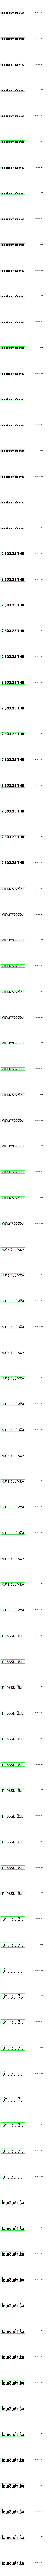

In [25]:
import os
import cv2
import easyocr
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# Define the folder path



import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

import cv2
img=cv2.imread(r"temp\Screenshot 2023-07-31 111434.png")
# cv2.imshow("window",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Create a list to store the desired texts and image paths
desired_texts = []
image_paths = []
folder_path_roi  = "temp/4_contour/krungsri/roi"
# Loop through the files and process each file
for filename in os.listdir(folder_path_roi):
    file_path = os.path.join(folder_path_roi, filename)
    
    # Check if the item is a file (not a subdirectory)
    if os.path.isfile(file_path):
        # Read the image
        img = cv2.imread(file_path)
        
        # Perform OCR on the image
        # easyocr_result = reader.recognize(img)
        tesseracttext = pytesseract.image_to_string(img, lang='tha+eng')
        print(tesseracttext)

        # Loop through the OCR results
        for result in tesseracttext:
            # Check if the text matches the desired patterns
            # text = result[1]
            
            desired_texts.append(text)
            image_paths.append(file_path)

# Write the desired texts to a file
output_filename = f"{folder_path}/text_ocr{img_prefix_name}.txt"
with open(output_filename, 'w', encoding='utf-8') as file:
    for text in desired_texts:
        file.write(text + '\n')

print("Desired texts have been written to", output_filename)

# Calculate the number of rows
num_rows = len(image_paths)

# Create a subplot with two columns
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

# Set a Thai font for rendering Thai text
font_properties = FontProperties(fname='fonts\THSarabunNew.ttf')  # Replace with the path to your Thai font

# Loop through the image paths and texts, and plot them in the subplot
for i, (image_path, text) in enumerate(zip(image_paths, desired_texts)):
    # Read and display the image on the left side
    img = cv2.imread(image_path)
    axs[i, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i, 0].axis('off')
    
    # Display the text on the right side with the Thai font
    axs[i, 1].text(0.5, 0.5, text, fontsize=24, ha='center', fontproperties=font_properties)
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()
